# Class Workbook

This is coding portion of your class workbook.  Please go through the sections below

## Welcome to MA679

Every module of the course will have a GitHub class that contains the chapter lab from your textbook and this application material, like your workbook/homework. You are expected to work on these materials during the class, but what you don't finish will become your homework.  At the end of each class, you must commit your work as proof of your class participation.

***

## In class activity

In [2]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
#import ISLP as islp

### Ames Housing data

In our first class, we will look at the Ames Housing data.
Please install `AmesHousing` package and look at the raw data.

In [3]:
ames_raw=pd.read_csv("ames_raw.csv")
ames_raw

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


The outcome variable of interest is `SalePrice` and you have a lot of features for each home.

A sample of them include

- `Year Built`: Original construction date
- `Lot Frontage`: Linear feet of street connected to the property
- `Lot Area`: Lot size in square feet
- `Neighborhood`: Physical locations within Ames city limits (map available)
- `Overall Qual`: Rates the overall material and finish of the house
- `Overall Cond`: Rates the overall condition of the house
- `Total Bsmt SF`: Total square feet of the basement area
- `1st Flr SF`: First Floor square feet
- `2nd Flr SF`: Second floor square feet
- `Gr Liv Area`: Above grade (ground) living area square feet
- `Bedroom`: Bedrooms above grade (does NOT include basement bedrooms)
- `Kitchen`: Kitchens above grade
- `KitchenQual`: Kitchen quality
- `TotRmsAbvGrd`: Total rooms above grade (does not include bathrooms)
- `Bsmt Full Bath`: Basement full bathrooms
- `Bsmt Half Bath`: Basement half bathrooms
- `Full Bath`: Full bathrooms above grade
- `Half Bath`: Half baths above grade, etc.

### Questions

- How many observations and features do you have in the data?

Your code:

In [4]:
ames_raw.shape

(2930, 82)

Your answer:

~~~
The number of observation is 2930 and the nummber of predictors is 82


~~~

- Please make some EDA figures to explore some of the most likely features associated with `SalePrice`.

Your code:

In [22]:
print(ames_raw.columns)

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

<Axes: xlabel='Bedroom AbvGr', ylabel='SalePrice'>

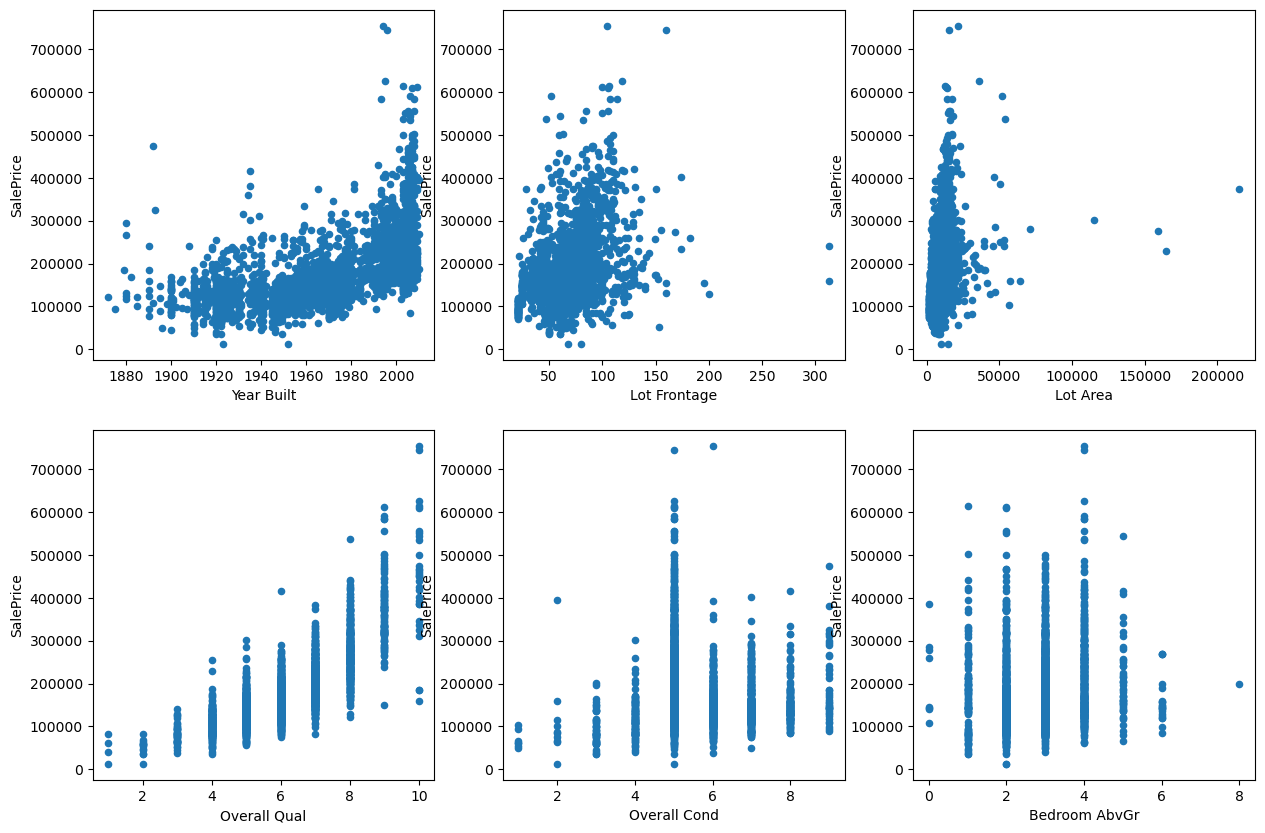

In [21]:
fig, axes = subplots(nrows=2, ncols=3, figsize=(15, 10))
ames_raw.plot.scatter('Year Built', 'SalePrice', ax=axes[0, 0])
ames_raw.plot.scatter('Lot Frontage', 'SalePrice', ax=axes[0, 1])
ames_raw.plot.scatter('Lot Area', 'SalePrice', ax=axes[0, 2])
ames_raw.plot.scatter('Overall Qual', 'SalePrice', ax=axes[1, 0])
ames_raw.plot.scatter('Overall Cond', 'SalePrice', ax=axes[1, 1])
ames_raw.plot.scatter('Bedroom AbvGr', 'SalePrice', ax=axes[1, 2])

Your answer:

~~~
Please write your answer in full sentences.


~~~

- Are there any structures in the data?  Obvious correlations to be aware of?

The sale price tends to be cheaper as the bulit year is older. There seems to be an apparent positive lenear relationship between overal quiality and sale price. 

~~~~

## Problem Set

### [Required] Auto Data

This exercise involves the `Auto` data set studied in the lab. Make sure that the missing values have been removed from the data.

(a) Which of the predictors are quantitative, and which are qualitative?

Your code:

In [27]:
Auto = pd.read_csv('Auto.data', delim_whitespace=True)
Auto_new = Auto.dropna()
Auto_new


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
394,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


Your answer:

~~~
Please write your answer in full sentences.

The quantitative variables are mpg, cylinders, diplacement, horspower, weight and accreleration. 
The qualitative varuables are year, origin and name. 
We can teat cylinders as qualitative variables because there are only a numnber of possible values for cylinders.

~~~


(b) What is the range of each quantitative predictor? You can answer this using the min() and max() methods in numpy.

Your code:

In [7]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~


(c) What is the mean and standard deviation of each quantitative predictor?

Your code:

In [8]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~


(d) Now remove the 10th through 85th observations. What is the range, mean, and standard deviation of each predictor in the subset of the data that remains?

Your code:

In [9]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~


(e) Using the full data set, investigate the predictors graphically, using scatterplots or other tools of your choice. Create some plots highlighting the relationships among the predictors. Comment on your findings.

Your code:

In [10]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~


(f) Suppose that we wish to predict gas mileage (mpg) based on the other variables. Do your plots suggest that any other variables might be helpful in predicting mpg? Justify your answer.

Your code:

In [11]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~

### [Optional] College Data

This exercise relates to the `College` data set, found in the file College.csv on the book website. It contains several variables for 777 different universities and colleges in the US. The
variables are

- `Private` : Public/private indicator
- `Apps` : Number of applications received
- `Accept` : Number of applicants accepted
- `Enroll` : Number of new students enrolled
- `Top10perc` : New students from the top 10% of high school class
- `Top25perc` : New students from the top 25% of high school class
- `F.Undergrad` : Number of full-time undergraduates
- `P.Undergrad` : Number of part-time undergraduates
- `Outstate` : Out-of-state tuition
- `Room.Board` : Room and board costs
- `Books` : Estimated book costs
- `Personal` : Estimated personal spending
- `PhD` : Percent of faculty with Ph.D.’s
- `Terminal` : Percent of faculty with a terminal degree
- `S.F.Ratio` : Student/faculty ratio
- `perc.alumni` : Percent of alumni who donate
- `Expend` : Instructional expenditure per student
- `Grad.Rate` : Graduation rate

Before reading the data into R, it can be viewed in Excel or a text editor.

(a) Use the pd.read_csv() function to read the data into Python. Call the loaded data college. Make sure that you have the directory set to the correct location for the data.

Your code:

In [12]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~


(b) Look at the data used in the notebook by creating and running a new cell with just the code college in it. You should notice that the first column is just the name of each university in a column named something like Unnamed: 0. We don’t really want pandas to treat this as data. However, it may be handy to have these names for later. Try the following commands and similarly look at the resulting data frames:

In [13]:
college2 = pd.read_csv('College.csv')#, index_col=0)
college3 = college2.rename({'Unnamed: 0': 'College'},axis=1)
college3 = college3.set_index('College')

This has used the first column in the file as an index for the data frame. This means that pandas has given each row a name corresponding to the appropriate university. Now you should see that the first data column is Private. Note that the names of the colleges appear on the left of the table. We also introduced a new python object above: a dictionary, which is specified by (key, value) pairs. Keep your modified version of the data with
the following:

In [14]:
college = college3

(c)
  Use the describe() method of to produce a numerical summary of the variables in the data set.

Your code:

In [15]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~



(d) . Use the pd.plotting.scatter_matrix() function to produce a scatterplot matrix of the first columns [Top10perc, Apps, Enroll]. Recall that you can reference a list C of columns of a data frame A using A[C].

Your code:

In [16]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~


(e) Use the boxplot() method of college to produce side-by-side
boxplots of Outstate versus Private.

Your code:

In [17]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~


(f) Create a new qualitative variable, called Elite, by binning the
Top10perc variable into two groups based on whether or not the
proportion of students coming from the top 10% of their high
school classes exceeds 50%.

In [18]:
college['Elite'] = pd.cut(college['Top10perc'], [0,0.5,1], labels=['No', 'Yes'])

Use the `value_counts()` method of `college['Elite']` to see how many elite universities there are. Finally, use the `boxplot()` method again to produce side-by-side boxplots of Outstate versus Elite.

Your code:

In [19]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~


(g) Use the `plot.hist()` method of college to produce some histograms with differing numbers of bins for a few of the quantitative variables. The command `plt.subplots(2, 2)` may be useful: it will divide the plot window into four regions so that four plots can be made simultaneously. By changing the arguments you can divide the screen up in other combinations.

Your code:

In [20]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~


(h) Continue exploring the data, and provide a brief summary of what you discover.

Your code:

In [21]:
#
#

Your answer:

~~~
Please write your answer in full sentences.


~~~